In [1]:
import numpy as np
import matplotlib.pyplot as plt
import samplooker as slook
import pickle, TOFPlanet, ppwd
import scipy as sp
from scipy import stats
from scipy.stats import norm
import statistics
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
def load_planets(fname):
    with open(fname, 'rb') as f:
        planets = pickle.load(f)
        print(f"Found {len(planets)} planets in {fname}.")
    return planets

In [4]:
def hist_moi(fname, title, newfig=False, bins='auto', density=True, **kwargs):
    # Prepare the data
    planets = load_planets(fname)
    ice = np.array([p.NMoI for p in planets])
    # Fit a normal distribution to the data: mean and standard deviation
    mu, std = norm.fit(ice)
    # Plot the PDF
    x = np.linspace(min(ice), max(ice), 1000)
    p = norm.pdf(x, mu, std)
    # Plot the histogram
    plt.hist(ice, bins=bins, density=density, **kwargs, alpha=0.5)
    # Plot the fit
   #plt.plot(x, p, label=['mu= {:.5f}'.format(mu), 'std= {:.5f}'.format(std)], color='red')
    plt.title(title)
    plt.xlabel(r'Normalized moment of inertia, $I/Ma_0^2$')
    plt.xlim(min(ice), max(ice))
    plt.savefig(title, dpi=300)
    plt.legend()
    #plt.show()

In [5]:
def hist_J2(fname, title, newfig=False, bins='auto', density=True, **kwargs):
    # Prepare the data
    planets = load_planets(fname)
    J2 = (np.array([p.Js[1] for p in planets]))*1e6
    # Fit a normal distribution to the data: mean and standard deviation
    mu, std = norm.fit(J2)
    # Plot the PDF
    x = np.linspace(min(J2), max(J2), 1000)
    p = norm.pdf(x, mu, std)
    # Plot the histogram
    plt.hist(J2, bins=bins, density=density, **kwargs, alpha=0.5)
    # Plot the fit
    #plt.plot(x, p, label=['mu= {:.5f}'.format(mu), 'std= {:.6f}'.format(std)], color='red')
    plt.title(title)
    plt.xlabel('J2 x 10^6')
    plt.xlim(min(J2), max(J2))
    plt.savefig(title, dpi=300)
    plt.legend()
    #plt.show()

In [6]:
uj0_deg4 = 'uranus/samples/deg4_observables_J0_planets.pickle'
uj2_deg4 = 'uranus/samples/deg4_observables_J2_planets.pickle'
uj0_deg6 = 'uranus/samples/deg6_observables_J0_planets.pickle'
uj2_deg6 = 'uranus/samples/deg6_observables_J2_planets.pickle'
uj0_deg8 = 'uranus/samples/deg8_observables_J0_planets.pickle'
uj2_deg8 = 'uranus/samples/deg8_observables_J2_planets.pickle'

Found 1316 planets in uranus/samples/deg4_observables_J2_planets.pickle.
Found 1000 planets in uranus/samples/deg6_observables_J2_planets.pickle.
Found 1333 planets in uranus/samples/deg8_observables_J2_planets.pickle.


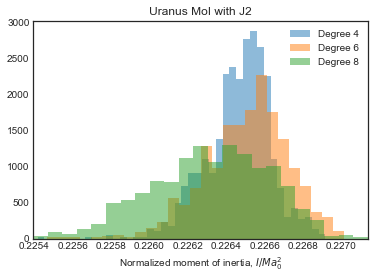

In [7]:
#hist_moi(uj0_deg4, 'Uranus MoI J0 Degree 4')
hist_moi(uj2_deg4,'Uranus MoI with J2 ', newfig=False, label='Degree 4')
#hist_moi(uj0_deg6, 'Uranus MoI J0 Degree 6')
hist_moi(uj2_deg6,'Uranus MoI with J2', newfig=False, label='Degree 6')
#hist_moi(uj0_deg8, 'Uranus MoI J0 Degree 8')
hist_moi(uj2_deg8,'Uranus MoI with J2', newfig=False, label='Degree 8')

Found 1316 planets in uranus/samples/deg4_observables_J2_planets.pickle.
Found 1000 planets in uranus/samples/deg6_observables_J2_planets.pickle.
Found 1333 planets in uranus/samples/deg8_observables_J2_planets.pickle.


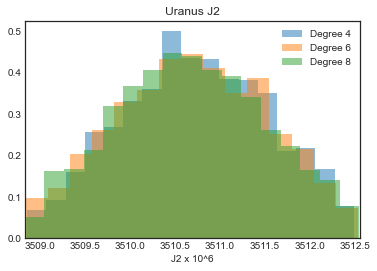

In [8]:
#hist_J2(uj0_deg4, 'J0 Degree 4', newfig=False)
hist_J2(uj2_deg4, 'Uranus J2', newfig=False, label='Degree 4')
#hist_J2(uj0_deg6, 'J0 Degree 6', newfig=False)
hist_J2(uj2_deg6, 'Uranus J2 ', newfig=False, label='Degree 6')
#hist_J2(uj0_deg8, 'J0 Degree 8', newfig=False)
hist_J2(uj2_deg8, 'Uranus J2', newfig=False, label='Degree 8')

In [9]:
def rho_profile(fname, title, c, newfig=False, **kwargs):
    planets = load_planets(fname)
    rho = np.array([p.rhoi for p in planets])
    r = np.array([p.si for p in planets])
    print(r.shape)
    for i in range(0,1001,50):
        plt.plot(r[i], rho[i], alpha=0.5, color=c, **kwargs)
        plt.title(title)
        plt.xlabel('Radius')
        plt.ylabel('Density')

Found 1316 planets in uranus/samples/deg4_observables_J2_planets.pickle.
(1316, 4096)


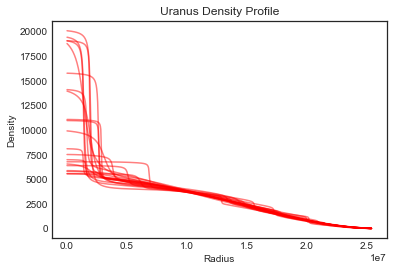

In [10]:
rho_profile(uj2_deg4,'Uranus Density Profile', 'red', newfig=True)
#rho_profile(uj2_deg6,'Uranus Density Profile', 'green', newfig=False)
#rho_profile(uj2_deg8,'Uranus Density Profile', 'blue', newfig=False)

In [11]:
def rho_profile1(fname, title, c, newfig=False, **kwargs):
    planets = load_planets(fname)
    rho = np.array([p.rhoi for p in planets]).T
    rcs = rho[-1,:]
    ind = np.argsort(rcs)
    rho = rho[:,ind]
    r = np.array(planets[0].si).T
    print(r.shape)
    for i in range(0,1001,50):
        plt.plot(r, rho[:,i], alpha=0.5, color=c, **kwargs)
        plt.title(title)
        plt.xlabel('Radius')
        plt.ylabel('Density')
        #plt.fill_between()

Found 1316 planets in uranus/samples/deg4_observables_J2_planets.pickle.
(4096,)


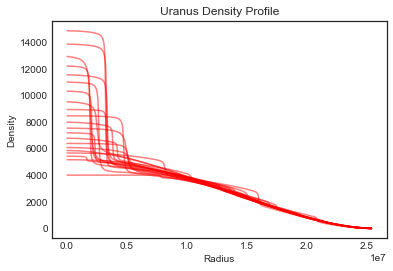

In [12]:
rho_profile1(uj2_deg4,'Uranus Density Profile', 'red', newfig=True)
#rho_profile1(uj2_deg6,'Uranus Density Profile', 'green', newfig=False)
#rho_profile1(uj2_deg8,'Uranus Density Profile', 'blue', newfig=False)